In [ ]:
!unzip "/content/drive/MyDrive/Dataset.zip"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: Training_Dataset/Normal/
  inflating: Training_Dataset/Normal/1.jpg  
  inflating: Training_Dataset/Normal/10 (2).jpg  
  inflating: Training_Dataset/Normal/10.driving-on-country-roads-1.jpg  
  inflating: Training_Dataset/Normal/10.g2vnvw1of2i11.jpg  
  inflating: Training_Dataset/Normal/10.island-road-trip-smooth-roads-road-trip-sunny-day-sky-having-cumulus-nimbus-clouds-along-empty-smooth-black-124987092.jpg  
  inflating: Training_Dataset/Normal/10.jpg  
  inflating: Training_Dataset/Normal/10.This-Is-the-Real-Difference-Between-Streets-Roads-and-Avenues_394392439-TTstudio-1024x684.jpg  
  inflating: Training_Dataset/Normal/100.5b23afff15e9f96fe6738e67.jpg  
  inflating: Training_Dataset/Normal/100.jpg  
  inflating: Training_Dataset/Normal/101.1946---N,-d-,09,-d-,93,-d-,04,-d-,04-driving.jpg  
  inflating: Training_Dataset/Normal/101.jpg  
  inflating: Training_Dataset/Normal/102.jpg  
  inflating: Training_Dataset/Normal/1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow #keras-deep learning library library built on top of tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation #dense layer is fully connected layer.
#Dropout is to prevent your model from overfitting.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
#initializing the parameters
image_width,image_height=200,200  #height and width of acceptable images to the model
training_data_dir=r"/content/Training_Dataset"

testing_data_dir=r"/content/Testing_Dataset"
epochs=70 #70 times the model will learn from the data.
batch_size=20  #takes 20 samples from the dataset

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channels_first":
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)

In [ ]:
trained_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale=1./255, #rescaling the pixels in range 0-255 to 0-1.
                                 shear_range=0.2, #applies 20% shear strain over image .
                                 zoom_range=0.3, #adjust the zoom in the range of 1-0.3 to 1+0.3.
                                 horizontal_flip=True,vertical_flip=True, #flips the image vertically and horizontally.
                                 rotation_range=360, #rotates the image in range of 0 to 360.
                                 fill_mode='nearest', #after rotating, if the image has whitespaces created then they are filled with the nearest pixels.
                                 width_shift_range=0.2,height_shift_range=0.2, #shifts the image by 20% in horizontal and vertical directions.
                                 brightness_range=[0.4,1.5] #this are the brightness shift values range
                                 )

tested_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255, brightness_range=[0.4,1.5])
trained_generator=trained_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                  classes=["Normal","Potholes","SpeedBumps"])

validated_generator=tested_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                      classes=["Normal","Potholes","SpeedBumps"])

Found 1703 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [ ]:
model_I1=InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)
model_I1.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [ ]:
model_I1.trainable=True
set_trainable=False

for layer in model_I1.layers:
  if layer.name=='conv2d_12':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in model_I1.layers:
  print(layer.name,layer.trainable)

input_1 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

In [ ]:
# for layers in models1.layers:
#   layers.trainable=False

model_I1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
#making classification layer to fit our model
from matplotlib.cbook import flatten
from tensorflow.keras import layers, models

flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation='relu')

dense_layer2=layers.Dense(20,activation='relu')

predictionlayer=layers.Dense(3,activation='softmax')

model_I17=models.Sequential([model_I1,
                         flatten_layer,
                         dense_layer1,
                        Dropout(0.2),
                         dense_layer2,
                         Dropout(0.2),
                         predictionlayer]) #dropout after each dense layer deactivates the 20% nodes of the above layer randomly in each epoch.
model_I17.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 50)                1638450   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 6

In [ ]:
from keras.optimizers import SGD


model_I17.compile(
    optimizer='SGD', loss='categorical_crossentropy',metrics='accuracy'
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduced_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=0.0001)
callback_list=[reduced_lr]

In [ ]:
traineed=model_I17.fit(trained_generator,steps_per_epoch=50,epochs=epochs, validation_data=validated_generator,shuffle=True, callbacks=callback_list)

Epoch 1/70
50/50 [==============================] - 70s 815ms/step - loss: 1.0398 - accuracy: 0.4588 - val_loss: 1.1366 - val_accuracy: 0.2864 - lr: 0.0100
Epoch 2/70
50/50 [==============================] - 38s 758ms/step - loss: 0.9776 - accuracy: 0.5090 - val_loss: 1.0871 - val_accuracy: 0.4409 - lr: 0.0100
Epoch 3/70
50/50 [==============================] - 37s 740ms/step - loss: 0.8813 - accuracy: 0.5510 - val_loss: 1.0585 - val_accuracy: 0.4386 - lr: 0.0100
Epoch 4/70
37/50 [=====================>........] - ETA: 6s - loss: 0.8653 - accuracy: 0.5837

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 36s 732ms/step - loss: 0.8797 - accuracy: 0.5748 - val_loss: 0.9894 - val_accuracy: 0.5545 - lr: 0.0100
Epoch 5/70
50/50 [==============================] - 38s 764ms/step - loss: 0.8415 - accuracy: 0.6090 - val_loss: 0.8777 - val_accuracy: 0.6000 - lr: 0.0100
Epoch 6/70
50/50 [==============================] - 35s 690ms/step - loss: 0.7545 - accuracy: 0.6928 - val_loss: 0.7714 - val_accuracy: 0.6909 - lr: 0.0100
Epoch 7/70
50/50 [==============================] - 38s 754ms/step - loss: 0.6384 - accuracy: 0.7560 - val_loss: 0.7891 - val_accuracy: 0.6773 - lr: 0.0100
Epoch 8/70
50/50 [==============================] - 37s 728ms/step - loss: 0.6665 - accuracy: 0.7304 - val_loss: 1.1403 - val_accuracy: 0.5045 - lr: 0.0100
Epoch 9/70
50/50 [==============================] - 35s 696ms/step - loss: 0.5642 - accuracy: 0.7935 - val_loss: 0.6354 - val_accuracy: 0.7045 - lr: 0.0100
Epoch 10/70
50/50 [==============================] - 39s 774ms/step - loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


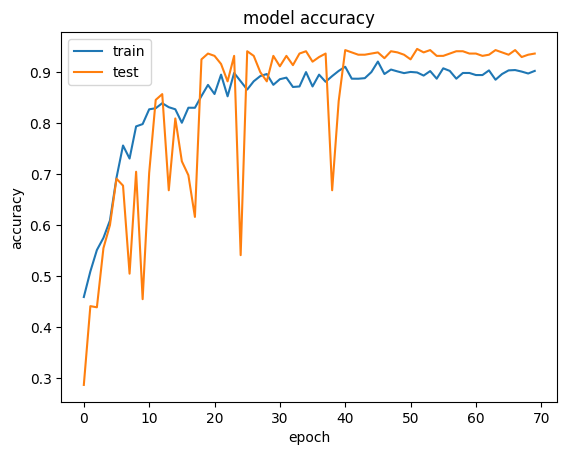

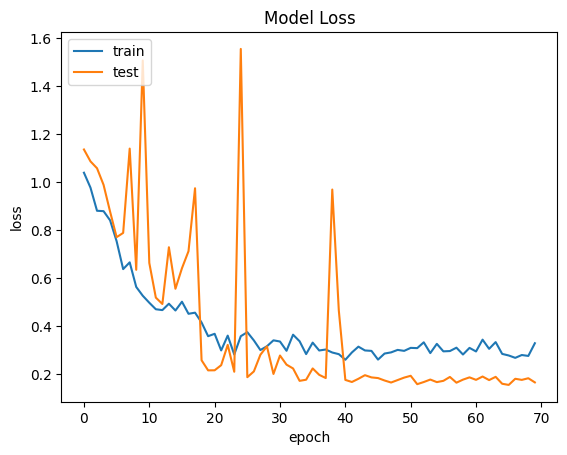

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(traineed.history.keys())
#summarize training for accuracy
plt.plot(traineed.history['accuracy'])
plt.plot(traineed.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()
#summarize training for loss
plt.plot(traineed.history['loss'])
plt.plot(traineed.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()